In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

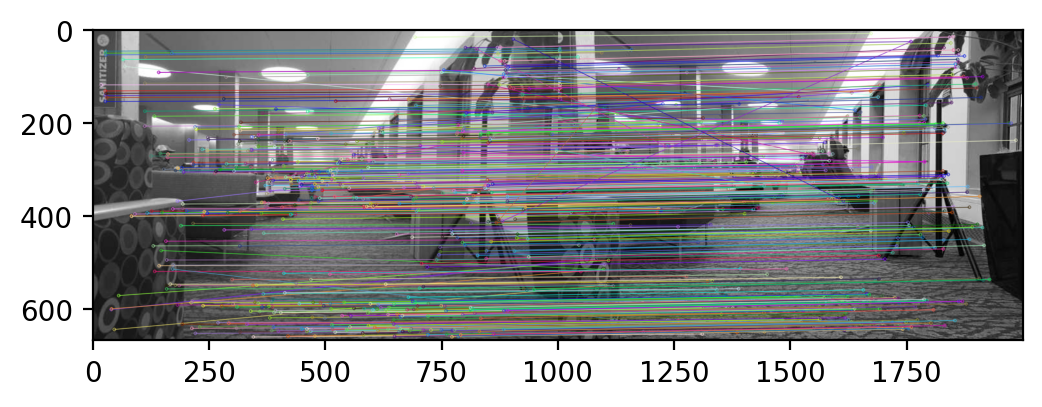

In [15]:
img1 = cv.imread('data/img1-1.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('data/img2-1.jpg',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

fig = plt.figure(1, dpi = 200)
plt.imshow(img3)

In [18]:
print(matches[0][0].queryIdx)
print(matches[0][0].trainIdx)

0
2057
